#  Algoritmos de busca aplicados ao Sudoku (com grade simples)

Sudoku, é um jogo baseado na colocação lógica de números. O objetivo do jogo é a colocação de números em cada uma das células vazias numa grade quadrada.
O quebra-cabeça contém algumas pistas iniciais, que são números inseridos em algumas células, de maneira a permitir uma indução ou dedução dos números em células que estejam vazias. Cada coluna, linha e região só pode ter um número de cada, sem poder conter números repetidos.

Exemplos de Sudoku 4x4 6x6 9x9

<img src="sudoku.png" width="800" height="400">

Utilizamos grafos para modelar o problema, sendo que cada nodo representa um estado do sudoku, aonde o nodo inicial representa o quadro inicial com algumas células ja preenchidas, e cada nodo vizinho representando um novo quadro com uma nova célula preenchida com um valor valido, quando não existe um vizinho com um valor valido para aquele nodo, e feito um backtrack, criando um novo nodo com um valor diferente para aquela célula, continuando com o processo ate o estado final, aonde todas as células estejam preenchidas com valores validos

Cada estado e representado por um nodo no grafo

<img src="sudoku2.png" width="1000" height="300">

No problema usamos uma heurística simples, que conta a quantidade de células ainda não preenchidas.

A função de custo entre os estados simplesmente conta a diferença absoluta entre a quantidade de casas em cada estado.

Vamos ver a aplicação das funções ditas acima, além de algumas outras auxiliares que são necessárias para a aplicação dos algoritmos. Primeiro, vamos estabelecer um sudoku de exemplo:

In [128]:
# === ignore this step, just imports ===
# foi preciso importar de alguma maneira o código do repositório aqui e esse foi
# o jeito mais fácil
import sys
import os

sys.path.append(os.path.join(os.getcwd(), '..'))

from sudoku import *
from algorithms import *

import os
from IPython.core.getipython import get_ipython
# Get the current notebook's path
notebook_path = get_ipython().getoutput('pwd')[0]
# === 

sudoku = [
            [-1, -1, -1,  2],
            [-1,  2, -1, -1],
            [2,  4,  1,  3],
            [3, -1,  2, -1]
        ]

Repare que na estrutura de dados que criamos, as posições da matriz com `-1` representam as casas vazias. 

Podemos checar se esse sudoku está finalizado com a função `goal_check`:

In [129]:
goal_check(sudoku)

False

Veja também a resposta da função para um sudoku válido:

In [130]:
matrix = [
    [4, 2, 3, 1],
    [1, 3, 4, 2],
    [2, 4, 1, 3],
    [3, 1, 2, 4]
]
goal_check(matrix)

True

A função de heurística nos dará uma estimativa do quão longe estamos da solução final. No caso, como são 8 casas com -1

In [131]:
heuristic(sudoku)

8

A função de custo, dará a diferença entre dois sudokus diferentes. Veja abaixo que foi definido um novo sudoku bem similar ao anterior, só que com uma casa a mais definida. Logo,o custo entre eles é 1.

In [132]:
sudoku2 = [
            [4, -1, -1,  2],
            [-1,  2, -1, -1],
            [2,  4,  1,  3],
            [3, -1,  2, -1]
        ]

cost_between(sudoku, sudoku2)

1

A função `find_neighbors` busca os vizinhos de um sudoku. Os vizinhos são basicamente outros sudokus, só que com uma casa preenchida de diferença do sudoku pai. Essa casa é preenchida de forma que não invalida a regra da quantidade de números por linha e coluna.

In [133]:
neighbors = find_neighbors(sudoku)

for idx, neighbor in enumerate(neighbors):
    print(f"#{idx}:")
    print_sudoku(neighbor)

#0:
1 _ _ 2
_ 2 _ _
2 4 1 3
3 _ 2 _
#1:
4 _ _ 2
_ 2 _ _
2 4 1 3
3 _ 2 _


# Experimentos
Com as funções básicas definidas, podemos aplicar elas nos algoritmos especificados do trabalho, sendo eles: busca em profundidade iterativa, busca A*, subida de encosta e busca por menor custo.

Em cada solução do algoritmo podemos visualizar algumas informações com a função `generate_output`.

### Busca em profundidade iterativa


In [134]:
solution,sG = iter_depth_search(initial_state=sudoku, goal_check=goal_check, find_neighbors= find_neighbors, max_depth=30)

for idx, ind_sol in enumerate(solution):
    print(f"#{idx}:")
    print_sudoku(ind_sol)

#0:
_ _ _ 2
_ 2 _ _
2 4 1 3
3 _ 2 _
#1:
1 _ _ 2
_ 2 _ _
2 4 1 3
3 _ 2 _
#2:
1 3 _ 2
_ 2 _ _
2 4 1 3
3 _ 2 _
#3:
1 3 4 2
_ 2 _ _
2 4 1 3
3 _ 2 _
#4:
1 3 4 2
4 2 _ _
2 4 1 3
3 _ 2 _
#5:
1 3 4 2
4 2 3 _
2 4 1 3
3 _ 2 _
#6:
1 3 4 2
4 2 3 1
2 4 1 3
3 _ 2 _
#7:
1 3 4 2
4 2 3 1
2 4 1 3
3 1 2 _
#8:
1 3 4 2
4 2 3 1
2 4 1 3
3 1 2 4


In [135]:
output_gen.generate_output((solution,sG), filename="sudoku_iter_depth", calculate_solution_cost=calculate_solution_cost)

Caminho da solução escrito  em: /home/bufulin/Desktop/IA-trabalho-1/relatorio/sudoku_iter_depth
Número de nós visitados: 68
Total de nós: 68
Profundidade da meta: 8
Custo da solução: 9


(68, 68, 8, 9)

### Busca A*

Veja como o A* sa bem menos nós que a busca em profundidade iterativa. Mas à partir daqui os resultados começam a ser bem similares

In [136]:
solution,sG = Astar(initial_state=sudoku, goal_check=goal_check, find_neighbors=find_neighbors, heuristic=heuristic,cost_between=cost_between)

output_gen.generate_output((solution,sG), filename="sudoku_Astar", calculate_solution_cost=calculate_solution_cost)

Caminho da solução escrito  em: /home/bufulin/Desktop/IA-trabalho-1/relatorio/sudoku_Astar
Número de nós visitados: 14
Total de nós: 15
Profundidade da meta: 8
Custo da solução: 9


(14, 15, 8, 9)

### Busca por subida de encosta


In [137]:
solution,sG = hill_climbing(initial_state=sudoku, goal_check=goal_check, find_neighbors=find_neighbors, heuristic=heuristic)

output_gen.generate_output((solution,sG), filename="sudoku_hill_climb", calculate_solution_cost=calculate_solution_cost)

Caminho da solução escrito  em: /home/bufulin/Desktop/IA-trabalho-1/relatorio/sudoku_hill_climb
Número de nós visitados: 14
Total de nós: 15
Profundidade da meta: 8
Custo da solução: 9


(14, 15, 8, 9)

### Busca por menos custo


In [138]:
solution,sG = least_cost.least_cost_path(initial_state=sudoku, goal_check=goal_check, find_neighbors=find_neighbors, cost_between=cost_between)

output_gen.generate_output((solution,sG), filename="sudoku_hill_climb", calculate_solution_cost=calculate_solution_cost)

Caminho da solução escrito  em: /home/bufulin/Desktop/IA-trabalho-1/relatorio/sudoku_hill_climb
Número de nós visitados: 15
Total de nós: 15
Profundidade da meta: 8
Custo da solução: 9


(15, 15, 8, 9)

## Bônus

Por acaso, foi feita uma função geradora de sudokus. Então podemos gerar um monte de sudokus e fazer gráficos para comparar seus resultados Em larga escala. 

### Múltiplas gerações para o hill climbing 

In [139]:
solutions = []
for i in range(100):
    generated=(create_sudoku_puzzle(4,12))
    solutions.append(hill_climbing(initial_state=generated, goal_check=goal_check, find_neighbors=find_neighbors, heuristic=heuristic))


Número de nós visitados: 61
Total de nós: 66
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 23
Total de nós: 25
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 80
Total de nós: 85
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 92
Total de nós: 100
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 39
Total de nós: 41
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 104
Total de nós: 112
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 95
Total de nós: 107
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 28
Total de nós: 31
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 112
Total de nós: 124
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 88
Total de nós: 96
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 136
Total de nós: 144
Profundidade da meta: 12
Custo da sol

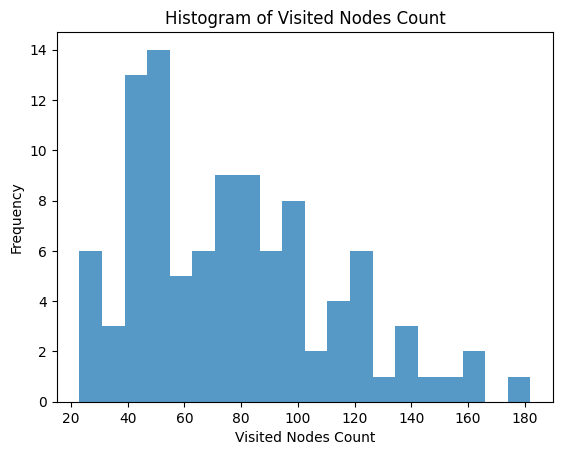

In [140]:
from matplotlib import pyplot as plt

visited_nodes_counts = [output_gen.generate_output((solution[0], solution[1]), calculate_solution_cost=calculate_solution_cost)[0]  for solution in solutions]

plt.hist(visited_nodes_counts, bins=20, alpha=0.75)
plt.title('Histogram of Visited Nodes Count')
plt.xlabel('Visited Nodes Count')
plt.ylabel('Frequency')
plt.show()

Número de nós visitados: 61
Total de nós: 66
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 23
Total de nós: 25
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 80
Total de nós: 85
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 92
Total de nós: 100
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 39
Total de nós: 41
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 104
Total de nós: 112
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 95
Total de nós: 107
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 28
Total de nós: 31
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 112
Total de nós: 124
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 88
Total de nós: 96
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 136
Total de nós: 144
Profundidade da meta: 12
Custo da sol

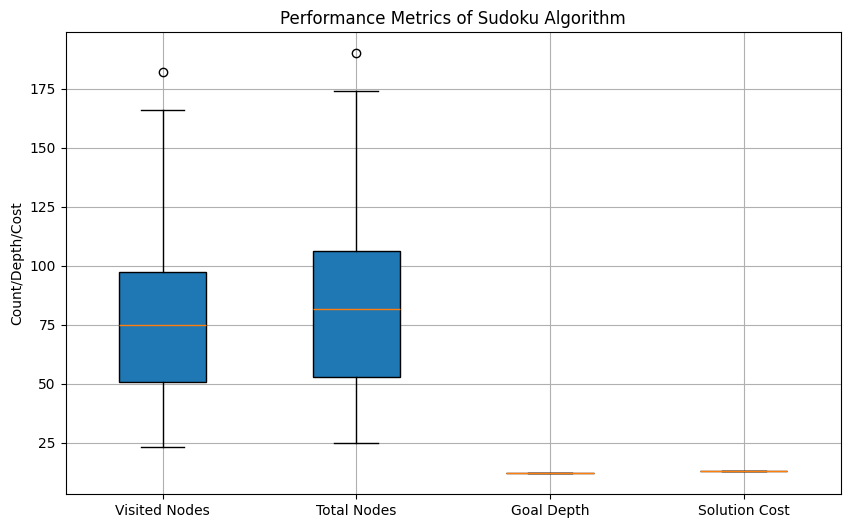

In [141]:
# Data setup
visited_nodes_counts = []
total_nodes_counts = []
goal_depths = []
solution_costs = []

# Iterate over the solutions and unpack the tuples to populate the lists
for solution in solutions:
    visited_nodes_count, total_nodes_count, goal_depth, solution_cost = output_gen.generate_output(
        (solution[0], solution[1]), 
        calculate_solution_cost=calculate_solution_cost
    )
    
    visited_nodes_counts.append(visited_nodes_count)
    total_nodes_counts.append(total_nodes_count)
    goal_depths.append(goal_depth)
    solution_costs.append(solution_cost)
labels = ['Visited Nodes', 'Total Nodes', 'Goal Depth', 'Solution Cost']


data = [visited_nodes_counts, total_nodes_counts, goal_depths, solution_costs]

# Box plot
plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.boxplot(data, labels=labels, patch_artist=True)

# Adding titles and labels
plt.title('Performance Metrics of Sudoku Algorithm')
plt.ylabel('Count/Depth/Cost')

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.show()


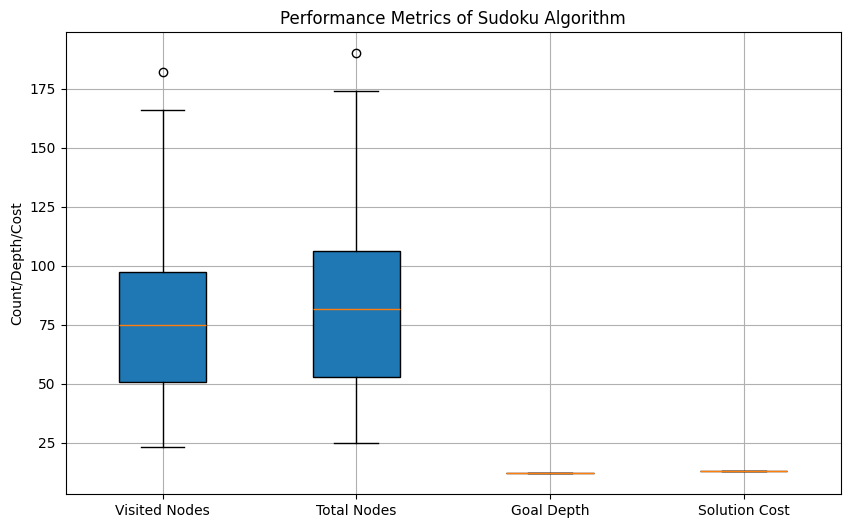

In [142]:

labels = ['Visited Nodes', 'Total Nodes', 'Goal Depth', 'Solution Cost']


data = [visited_nodes_counts, total_nodes_counts, goal_depths, solution_costs]

# Box plot
plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.boxplot(data, labels=labels, patch_artist=True)

# Adding titles and labels
plt.title('Performance Metrics of Sudoku Algorithm')
plt.ylabel('Count/Depth/Cost')

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.show()


Múltiplas gerações para o Astar

In [143]:
solutions = []
for i in range(100):
    generated=(create_sudoku_puzzle(4,12))
    solutions.append(Astar(initial_state=generated, goal_check=goal_check, 
                           find_neighbors=find_neighbors,
                             heuristic=heuristic,
                             cost_between=cost_between))


Número de nós visitados: 37
Total de nós: 39
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 35
Total de nós: 37
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 53
Total de nós: 59
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 57
Total de nós: 63
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 94
Total de nós: 102
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 51
Total de nós: 55
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 85
Total de nós: 93
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 117
Total de nós: 125
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 67
Total de nós: 71
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 73
Total de nós: 81
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 58
Total de nós: 63
Profundidade da meta: 12
Custo da solução:

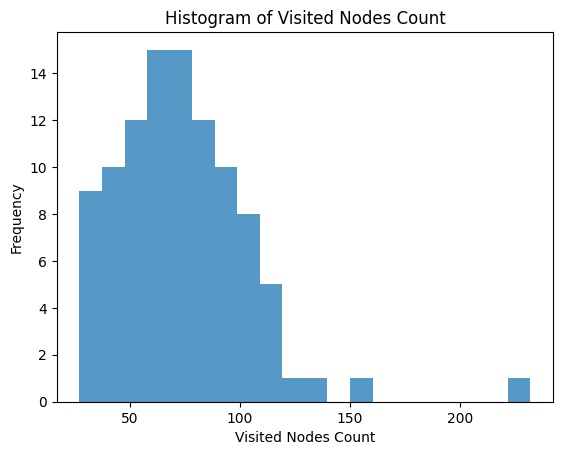

In [145]:
from matplotlib import pyplot as plt

visited_nodes_counts = [output_gen.generate_output((solution[0], solution[1]), calculate_solution_cost=calculate_solution_cost)[0]  for solution in solutions]

plt.hist(visited_nodes_counts, bins=20, alpha=0.75)
plt.title('Histogram of Visited Nodes Count')
plt.xlabel('Visited Nodes Count')
plt.ylabel('Frequency')
plt.show()

Número de nós visitados: 37
Total de nós: 39
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 35
Total de nós: 37
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 53
Total de nós: 59
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 57
Total de nós: 63
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 94
Total de nós: 102
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 51
Total de nós: 55
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 85
Total de nós: 93
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 117
Total de nós: 125
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 67
Total de nós: 71
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 73
Total de nós: 81
Profundidade da meta: 12
Custo da solução: 13
Número de nós visitados: 58
Total de nós: 63
Profundidade da meta: 12
Custo da solução:

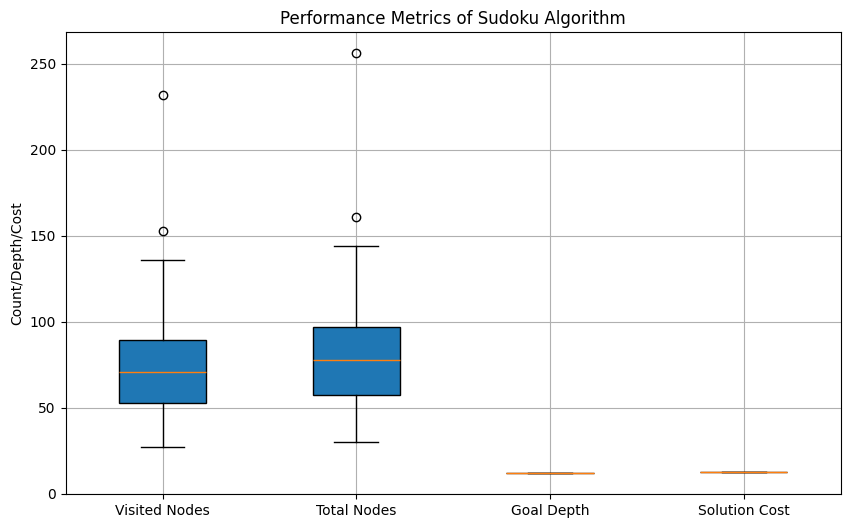

In [144]:
# Data setup
visited_nodes_counts = []
total_nodes_counts = []
goal_depths = []
solution_costs = []

# Iterate over the solutions and unpack the tuples to populate the lists
for solution in solutions:
    visited_nodes_count, total_nodes_count, goal_depth, solution_cost = output_gen.generate_output(
        (solution[0], solution[1]), 
        calculate_solution_cost=calculate_solution_cost
    )
    
    visited_nodes_counts.append(visited_nodes_count)
    total_nodes_counts.append(total_nodes_count)
    goal_depths.append(goal_depth)
    solution_costs.append(solution_cost)
labels = ['Visited Nodes', 'Total Nodes', 'Goal Depth', 'Solution Cost']


data = [visited_nodes_counts, total_nodes_counts, goal_depths, solution_costs]

# Box plot
plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.boxplot(data, labels=labels, patch_artist=True)

# Adding titles and labels
plt.title('Performance Metrics of Sudoku Algorithm')
plt.ylabel('Count/Depth/Cost')

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.show()
